In [59]:
# Data handling
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib  # For saving the model
from sklearn.preprocessing import LabelEncoder

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# GUI
import tkinter as tk
from tkinter import messagebox

#3d visualization
from mpl_toolkits.mplot3d import Axes3D

STEP 1- DATA COLLECTION

In [2]:
df = pd.read_csv('Iris classification.csv')

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.duplicated().sum()

3

STEP 2- DATA CLEANING

In [11]:
# Drop duplicate rows
df = df.drop_duplicates()
print("New shape after removing duplicates:", df.shape)

New shape after removing duplicates: (147, 5)


In [13]:
# Features
X = df.drop('Species', axis=1)

# Target
y = df['Species']

STEP 3- EXPLORATORY DATA ANALYSIS

3.1 Distribution of Species

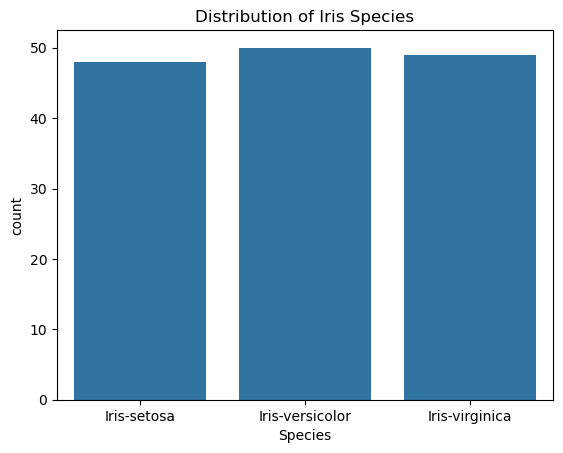

In [15]:
sns.countplot(x='Species', data=df)
plt.title("Distribution of Iris Species")
plt.show()

3.2  Pair Plot (to show feature separability)

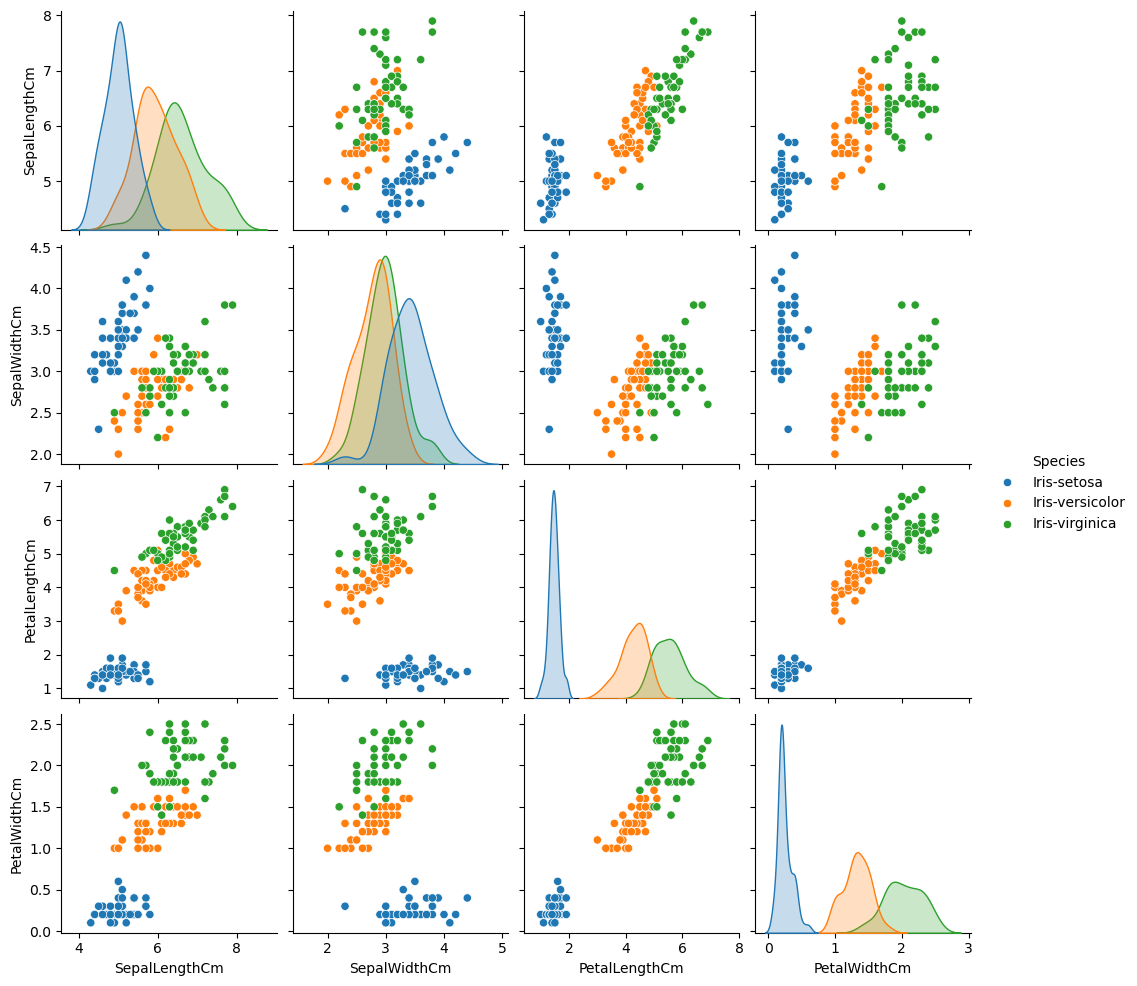

In [17]:
sns.pairplot(df, hue='Species')
plt.show()

3.3 Histograms

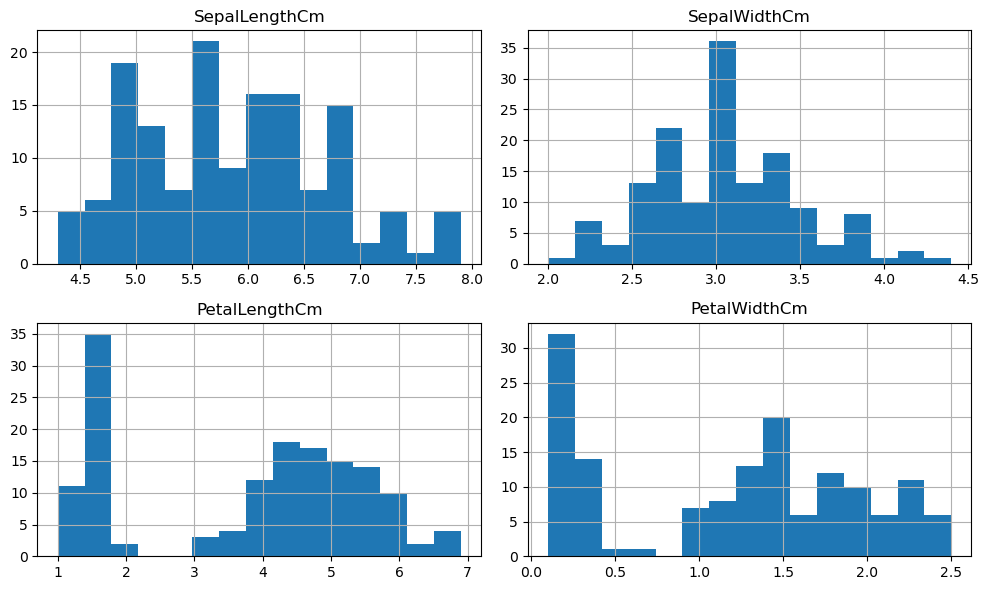

In [19]:
df.hist(figsize=(10, 6), bins=15)
plt.tight_layout()
plt.show()

3.4 Correlation Heatmap

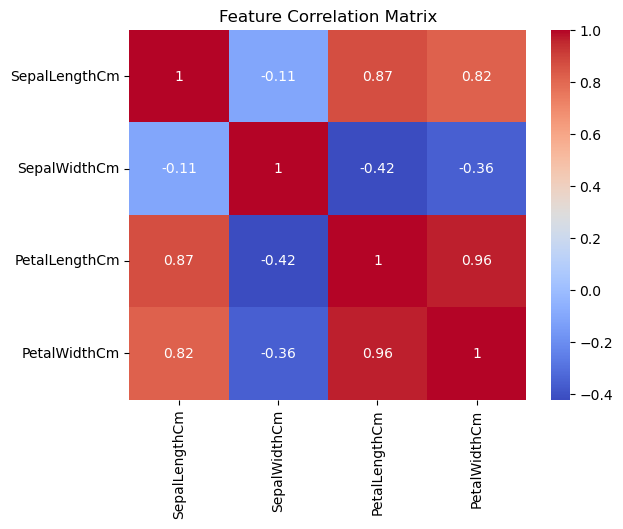

In [21]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

3.5 Boxplot by Species

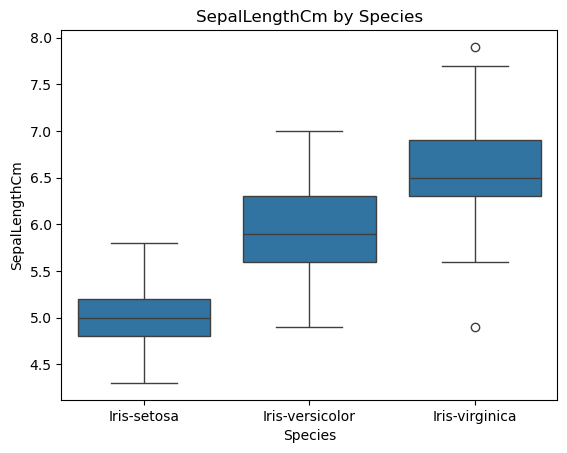

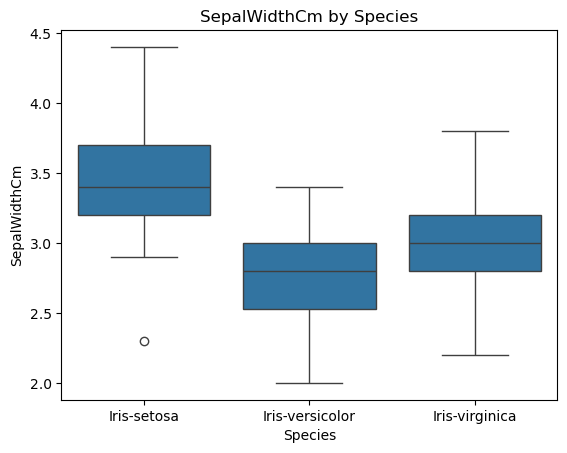

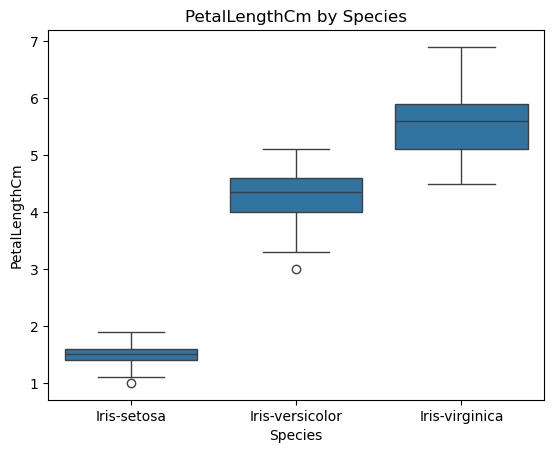

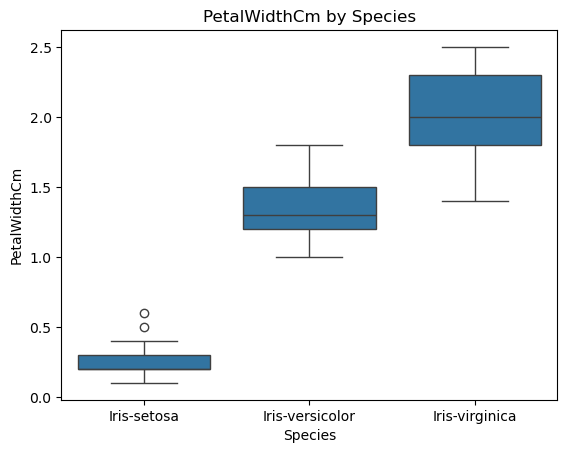

In [23]:
for col in ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']:
    sns.boxplot(x='Species', y=col, data=df)
    plt.title(f"{col} by Species")
    plt.show()

STEP 4- DATA PREPROCESSING

4.1 Encoding Target Labels

In [25]:
le = LabelEncoder()
y = le.fit_transform(y)

print("Encoded classes:", le.classes_)

Encoded classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


4.2 Train-Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (117, 4)
Test size: (30, 4)


4.3 Feature Scaling (Standardization)

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

STEP 5- MODEL TRAINING AND EVALUATION

5.1 Finding the best k for KNN

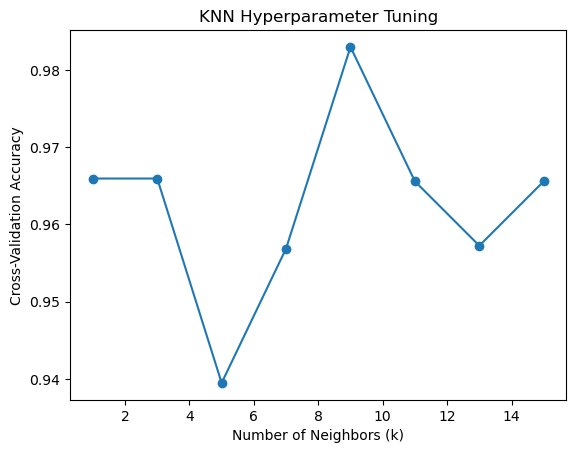

Best k value: 9 with CV accuracy: 0.98


In [41]:
k_values = range(1, 16, 2)  # Odd k values from 1 to 15
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting accuracy vs k
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.show()

# Best k
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k value: {best_k} with CV accuracy: {max(cv_scores):.2f}")

5.2 Training the KNN Model

In [31]:
# Creating and training the model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

5.2 Making Prediction

In [33]:
y_pred = model.predict(X_test)

5.3  Decision Boundary visualization

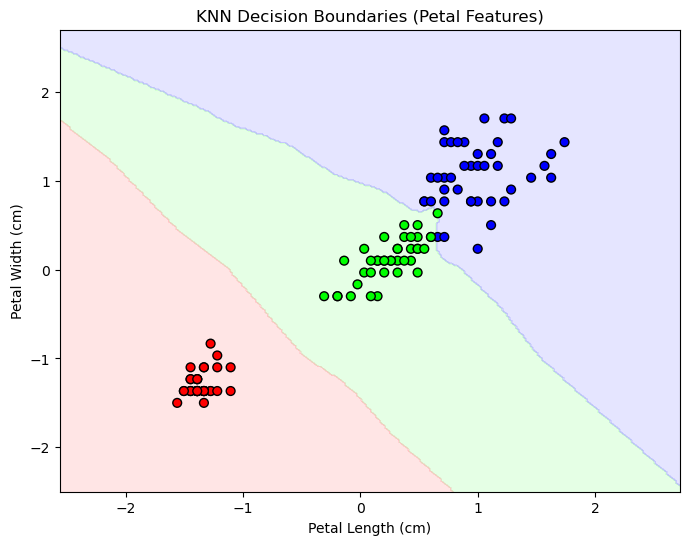

In [56]:
# Selecting only two features for 2D visualization (Petal Length & Petal Width)
X_vis = X_train[:, 2:4]  # Petal length, Petal width
y_vis = y_train

# Training a new KNN model for visualization
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_vis, y_vis)

# Creating a mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predicting for each point in the grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting decision boundary
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap=cmap_bold, edgecolor='k', s=40)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("KNN Decision Boundaries (Petal Features)")
plt.show()

5.4 3D Scatter Plot

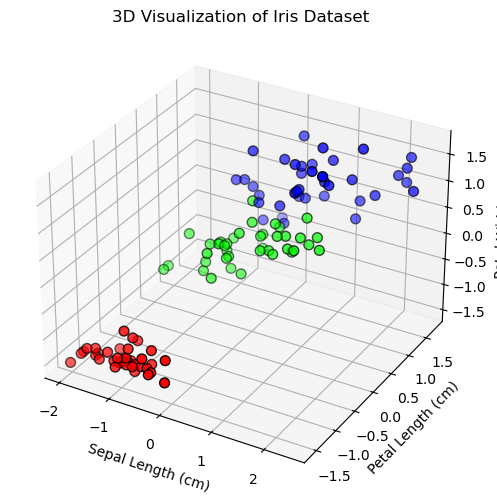

In [61]:
# Prepare 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Select 3 features: Sepal Length, Petal Length, Petal Width
ax.scatter(X_train[:, 0], X_train[:, 2], X_train[:, 3],
           c=y_train, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']),
           edgecolor='k', s=50)

# Labels
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Visualization of Iris Dataset')

plt.show()

5.3 Evaluating the Model

Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



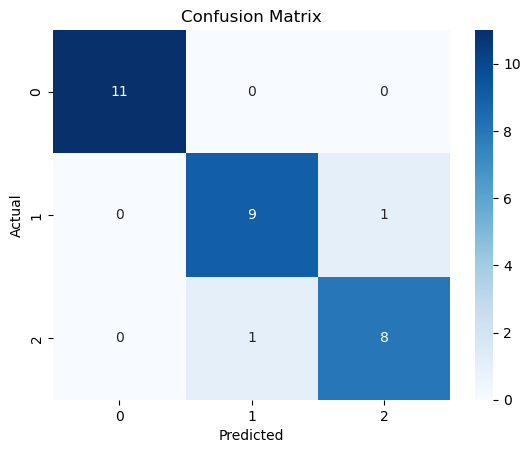

In [35]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

5.4 Showing Misclassified Samples

In [44]:
# Predicting on test set
y_pred = model.predict(X_test)

# Getting misclassified indices
misclassified_idx = np.where(y_pred != y_test)[0]

print("Misclassified Samples:\n")
for idx in misclassified_idx:
    print(f"Index: {idx}, Features: {X_test[idx]}, True: {y_test[idx]}, Predicted: {y_pred[idx]}")

Misclassified Samples:

Index: 4, Features: [-1.23991982 -1.30617241  0.37379316  0.63388017], True: 2, Predicted: 1
Index: 8, Features: [ 0.10559182 -0.85134452  0.71501916  0.50049172], True: 1, Predicted: 2


5.5 Macro f1 score

In [51]:
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score: {macro_f1:.2f}")

Macro F1 Score: 0.93


STEP 6- SAVING THE TRAINED MODEL

In [37]:
# Saving the model
joblib.dump(model, "iris_model.pkl")

# Saving the scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

STEP 7- CONCLUSION

This project was all about taking the well known Iris dataset and turning it into a working, interactive machine learning application. We started by exploring and cleaning the data to make sure everything was ready for modeling. Then, we analyzed the patterns in the sepal and petal measurements, which gave us useful insights into how different flower species can be separated.

We trained a K-nearest Neighbors (KNN) model which turned out to be a great fit for this dataset. With an accuracy of 93.3% and a strong macro F1 score of 0.93, the model performed very well, making only a couple of mistakes on the test set. We also checked which samples were misclassified to understand where the model struggled, which is a good habit in any machine learning project.

The best part was turning the model into something anyone can see use - a simple GUI built with Tkinter. Now, instead of running Python code, a user can just type in the flower's measurements, click a button, and instantly get the prediction. 

Overall, this project shows the complete journey - from raw data to an easy to use application. It's accurate, interactive, and could be extended or improved further, but even as it stands, it's a solid example of taking machine learning beyond theory and making it work in the real world. quick to read.
